In [1]:
import pandas as pd
import json
from matplotlib import pyplot as plt
!pip install pycountry
import pycountry
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
with open("files/rankings.json", encoding = 'utf-8') as f:
    data = json.load(f)

In [3]:
years = [{'year': year,
         'player_name': ['' for _ in range(20)],
         'position': [0 for _ in range(20)]
         }
         for year in range(2013, 2022)]

In [4]:
for pos, conj in enumerate(data['rankings']):
    years[pos]['year'] = conj['year']
    years[pos]['player_name'] = [conj['placings'][k]['player'] for k in range(20)]
    years[pos]['position'] = [k for k in range(1, 21)]

In [5]:
overall = pd.concat([pd.DataFrame(k) for k in years]).reset_index(drop=True)

In [6]:
overall

,year,player_name,position
0,2013,GeT_RiGhT,1
1,2013,f0rest,2
2,2013,shox,3
3,2013,Dosia,4
4,2013,NBK,5
...,...,...,...
175,2021,stavn,16
176,2021,Twistzz,17
177,2021,ropz,18
178,2021,EliGE,19


In [7]:
players_records = pd.read_excel('files/players_personal_data.xlsx', sheet_name='players')

In [8]:
players_records.replace({'Russia': 'Russian Federation', 'Czech Republic': 'Czechia'}, inplace=True)

In [9]:
players = {'player_name': [],
           'first_time': [],
           'number_of_top20': []}
for nm in overall['player_name'].unique():
  players['player_name'].append(nm)
  players['first_time'].append(overall[overall['player_name'] == nm]['year'].min())
  players['number_of_top20'].append(overall[overall['player_name'] == nm]['year'].count())
players = pd.DataFrame(players)


In [10]:
players = pd.merge(players, players_records)

In [11]:
players

,player_name,first_time,number_of_top20,birth_year,action_start,retired,country
0,GeT_RiGhT,2013,4,1990,2003,1,Sweden
1,f0rest,2013,4,1988,2003,0,Sweden
2,shox,2013,4,1992,2006,1,France
3,Dosia,2013,1,1988,2007,1,Russian Federation
4,NBK,2013,3,1994,2009,0,France
...,...,...,...,...,...,...,...
74,Ax1Le,2021,1,2002,2018,0,Russian Federation
75,YEKINDAR,2021,1,1999,2017,0,Latvia
76,b1t,2021,1,2003,2019,0,Ukraine
77,Jame,2021,1,1998,2017,0,Russian Federation


In [12]:
players['age_first_top20'] = players['first_time'] - players['birth_year']

In [13]:
players['career_years_first_top20'] = players['first_time'] - players['action_start']

In [14]:
players['avg_top20_per_career_time'] = players['number_of_top20'] / (2022 - players['action_start'])

# Jogadores com as 4 maiores presenças no Top 20 HLTV

In [15]:
most_top20 = players.sort_values('number_of_top20', ascending=False)
most_top20 = most_top20[most_top20['number_of_top20'].isin(players['number_of_top20'].value_counts().sort_index(ascending=False).index[:4])]
most_top20.reset_index(drop=True)[['player_name', 'number_of_top20']]

,player_name,number_of_top20
0,device,8
1,dupreeh,7
2,NiKo,6
3,GuardiaN,6
4,s1mple,6
5,EliGE,5
6,KRIMZ,5
7,kennyS,5


# Jogadores mais jovens a receberem a primeira indicação ao Top 20 HLTV


In [16]:
yougest_top20 = players.sort_values('age_first_top20', ascending=True)
yougest_top20 = yougest_top20[yougest_top20['age_first_top20'].isin(players['age_first_top20'].value_counts().sort_index(ascending=True).index[:3])]
yougest_top20.reset_index(drop=True)[['player_name', 'age_first_top20']]

,player_name,age_first_top20
0,sergej,17
1,Brollan,17
2,swag,18
3,Xyp9x,18
4,stavn,18
5,Kjaerbye,18
6,flamie,18
7,Magisk,18
8,kennyS,18
9,JW,18


# Distribuição das idades com as quais houve a primeira indicação ao Top 20 HLTV

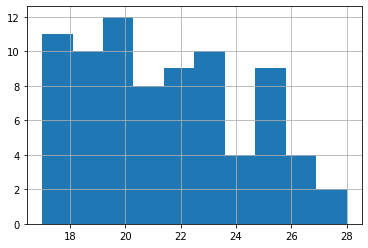

In [17]:
players['age_first_top20'].hist( )

# Tempo médio de carreira para a primeira aparição no Top 20

In [18]:
print(f"Em média, os jogadores tinham {players['career_years_first_top20'].mean():.0f} anos de carreira.")

youngest = players[players['career_years_first_top20']==players['career_years_first_top20'].min()]
oldest = players[players['career_years_first_top20']==players['career_years_first_top20'].max()]
print(f"O jogador mais velho foi {oldest['player_name'].values[0]}, com {oldest['career_years_first_top20'].values[0]} anos de carreira.")
print(f"Os mais novos foram {youngest['player_name'].values[0]} e {youngest['player_name'].values[1]}, com {youngest['career_years_first_top20'].values[1]}.")

Em média, os jogadores tinham 5 anos de carreira.
O jogador mais velho foi NEO, com 13 anos de carreira.
Os mais novos foram dupreeh e KRIMZ, com 1.


In [19]:
most_popular_countries = players_records['country'].value_counts().to_frame()
most_popular_countries['count'] = most_popular_countries.index
most_popular_countries.reset_index(drop=True, inplace=True)
most_popular_countries['country'], most_popular_countries['count'] = most_popular_countries['count'],  most_popular_countries['country']

In [20]:
input_countries = most_popular_countries['country'].values

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

most_popular_countries['iso_alpha'] = [countries.get(country, 'Unknown code') for country in input_countries]

In [21]:
import plotly.express as px
fig = px.scatter_geo(most_popular_countries,
                     locations="iso_alpha",
                     hover_name="country",
                     size="count",
                     projection="natural earth",
                     basemap_visible=True)
fig.show()

In [22]:
most_popular_countries.dtypes

country      object
count         int64
iso_alpha    object
dtype: object

In [44]:
hdi = pd.read_csv('files/Human Development Index (HDI).csv')
hdi = hdi[[c for c in hdi.columns if "Unnamed" not in c]]

In [45]:
hdi.replace({'..': np.nan}, inplace=True)

In [46]:
hdi = hdi[['country', '2019']]

In [47]:
hdi['country'] = [k.strip() for k in hdi['country']]

In [48]:
hdi

,country,2019
0,Afghanistan,0.511
1,Albania,0.795
2,Algeria,0.748
3,Andorra,0.868
4,Angola,0.581
...,...,...
184,Venezuela (Bolivarian Republic of),0.711
185,Viet Nam,0.704
186,Yemen,0.470
187,Zambia,0.584


In [49]:
hdi['2019'] = hdi['2019'].astype(float)

In [50]:
hdi['country'] = [str(k) for k in hdi['country']]

In [53]:
most_popular_countries = pd.merge(most_popular_countries, hdi, on='country', how='left')

In [54]:
most_popular_countries

,country,count,iso_alpha,2019
0,Denmark,12,DNK,0.940
1,Sweden,10,SWE,0.945
2,Brazil,8,BRA,0.765
3,United States,8,USA,0.926
4,France,8,FRA,0.901
5,Russian Federation,6,RUS,0.824
6,Ukraine,4,UKR,0.779
7,Poland,4,POL,0.880
8,Finland,3,FIN,0.938
9,Canada,2,CAN,0.929


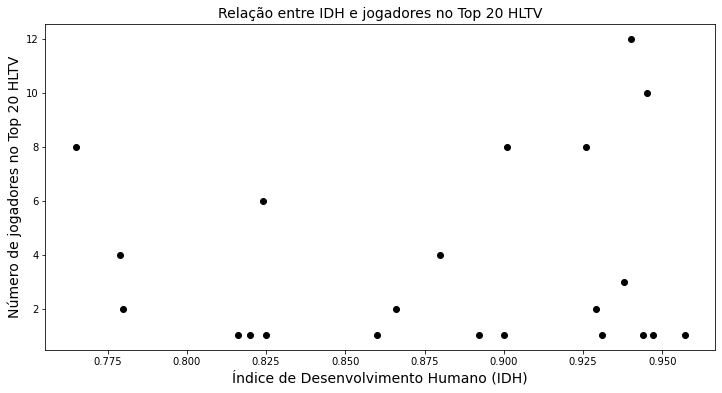

In [65]:
plt.figure(figsize=(12, 6))
plt.scatter(most_popular_countries['2019'], most_popular_countries['count'], color='k', )
plt.title("Relação entre IDH e jogadores no Top 20 HLTV", fontsize=14)
plt.xlabel("Índice de Desenvolvimento Humano (IDH)", fontsize=14)
plt.ylabel("Número de jogadores no Top 20 HLTV", fontsize=14)
plt.show()

In [57]:
most_popular_countries.sort_values('2019')

,country,count,iso_alpha,2019
2,Brazil,8,BRA,0.765
6,Ukraine,4,UKR,0.779
10,Bosnia and Herzegovina,2,BIH,0.780
20,Bulgaria,1,BGR,0.816
18,Turkey,1,TUR,0.820
5,Russian Federation,6,RUS,0.824
14,Kazakhstan,1,KAZ,0.825
12,Slovakia,1,SVK,0.860
11,Latvia,2,LVA,0.866
7,Poland,4,POL,0.880
